# Project 1 : Sales Data Analysis
**Explanation** : 

In this project,we work with a sales database to extract transaction data and perform an in-depth analysis of sales trend using pandas.The objective is to gain insights into sales performance over time,identify top-performing products and visualize the result for better decision-making.

# Step1: **Connecting to the Sales Database First** : 
First you will establish a connection to your sales databases using SQLAlchemy `create_engine`.This connection will allow to execute SQL queries and extract the neccessary transaction data.

In [1]:
from sqlalchemy import create_engine

In [2]:
import pandas as pd

In [3]:
# Example connection to an SQLite sales database
engine=create_engine('sqlite:///sales_data.db')
connection=engine.connect()

# Querying Transaction Data
Next you will write and execute SQL queries to extract relevant transaction data from the database.For example you might want to retrieve all transactions that occurred within a specific data range.

In [6]:
# sql query to extract transaction data
query='''
SELECT transaction_id,product_id,quantity,price,transaction_date
FROM transactions
WHERE transaction_date BETWEEN '2023-01-01' AND '2023-12-31'
'''


In [7]:
#Load the data into a pandas into a Pandas DataFrame
df_transactions=pd.read_sql(query,con=connection)

# Performing Sales Trend Analysis
With the transaction data in a DataFrame,we can perform various analyses to uncover sales trends.For example we could calculate the total sales for each product and visulaize the top-selling products.

In [16]:
# calculating total sales for each product
df_transactions['total_sales']=df_transactions['quantity']*df_transactions['price']
# print(df_transactions)


In [17]:
sales_summary = df_transactions.groupby('product_id')['total_sales'].sum().reset_index()
# print(sales_summary)

In [11]:
#sort products by total sales
top_products=sales_summary.sort_values(by='total_sales',ascending=False).head(10)

In [12]:
print(top_products)

  product_id  total_sales
8       P009        79.00
7       P008        66.30
3       P004        48.00
2       P003        45.00
4       P005        41.25
5       P006        28.60
9       P010        27.20
0       P001        21.00
1       P002        20.75
6       P007        18.50


# Visualizing Sales Trends

In [18]:
import matplotlib.pyplot as plt

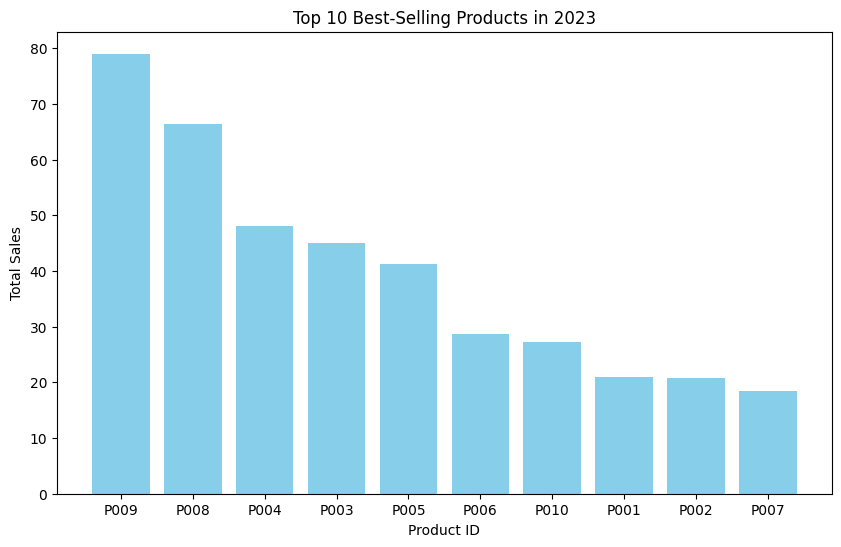

In [21]:
#plot the top 10 product by sales
plt.figure(figsize=(10,6))
plt.bar(top_products['product_id'],top_products['total_sales'],color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.title('Top 10 Best-Selling Products in 2023')
plt.show()